# Youjung Park
## DA320 - Detecting Outliers
### 05/12/2023


In [1]:
import json

# Retrieve credentials to connect to mongodb
with open('mongo.credentials.json') as f:
    data = json.load(f)
    connection_string = data['mongodb']

In [2]:
import pymongo
import certifi

# Connect to the server and retrieve the database in mongodb
client = pymongo.MongoClient(connection_string, tlsCAFile=certifi.where())

# Open the database in mongodb
db_da320 = client['DA320']

# Open the collection in mongodb
collections = db_da320.list_collection_names()

# Print mongodb info and collections to check if it has connected correctly
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {collections}")

Using MongoDB version 6.0.5.
This database has the collections ['metacritic_movie', 'imdb_Superhero']


In [3]:
import pandas as pd

# Read collection name "imdb_Superhero"
collection_imdb = db_da320["imdb_Superhero"]

# Retrieve all data from the collection
cursor = collection_imdb.find()

# Convert the data into a Pandas Dataframe
imdb = pd.DataFrame(cursor)

# Print the data to verify the written code
print(f"Total Count Found: {len(imdb)}")
imdb.head()


Total Count Found: 29443


,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6451922be89fe01a69f15c3a,77631,Grease,110.0,7.2,265183,TV-14::(D),6/13/1978,6000000.0,60759.0,394955690.0,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,6451922be89fe01a69f15c3b,78346,Superman,143.0,7.4,172769,TV-PG::(LV),12/10/1978,55000000.0,7465343.0,166200000.0,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,6451922be89fe01a69f15c3c,77416,The Deer Hunter,183.0,8.1,334827,R,12/8/1978,15000000.0,NaN,NaN,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,6451922be89fe01a69f15c3d,77651,Halloween,91.0,7.7,267109,TV-14,10/25/1978,300000.0,NaN,70000000.0,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,6451922be89fe01a69f15c3e,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000.0,201747.0,3371006.0,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


In [4]:
# Print the data type retrieved fromt the database
print(imdb.dtypes)

# Transform released date from object to date
imdb["release_date"] = pd.to_datetime(imdb["release_date"], errors = "coerce")

_id                 object
id                   int64
title               object
runtime            float64
user_rating        float64
votes                int64
mpaa_rating         object
release_date        object
budget             float64
opening_weekend    float64
gross_sales        float64
genres              object
cast                object
director            object
producer            object
company             object
dtype: object


In [5]:
from matplotlib import pyplot

Total Count with Null Value: 29443
Total Count without Null Value: 29418


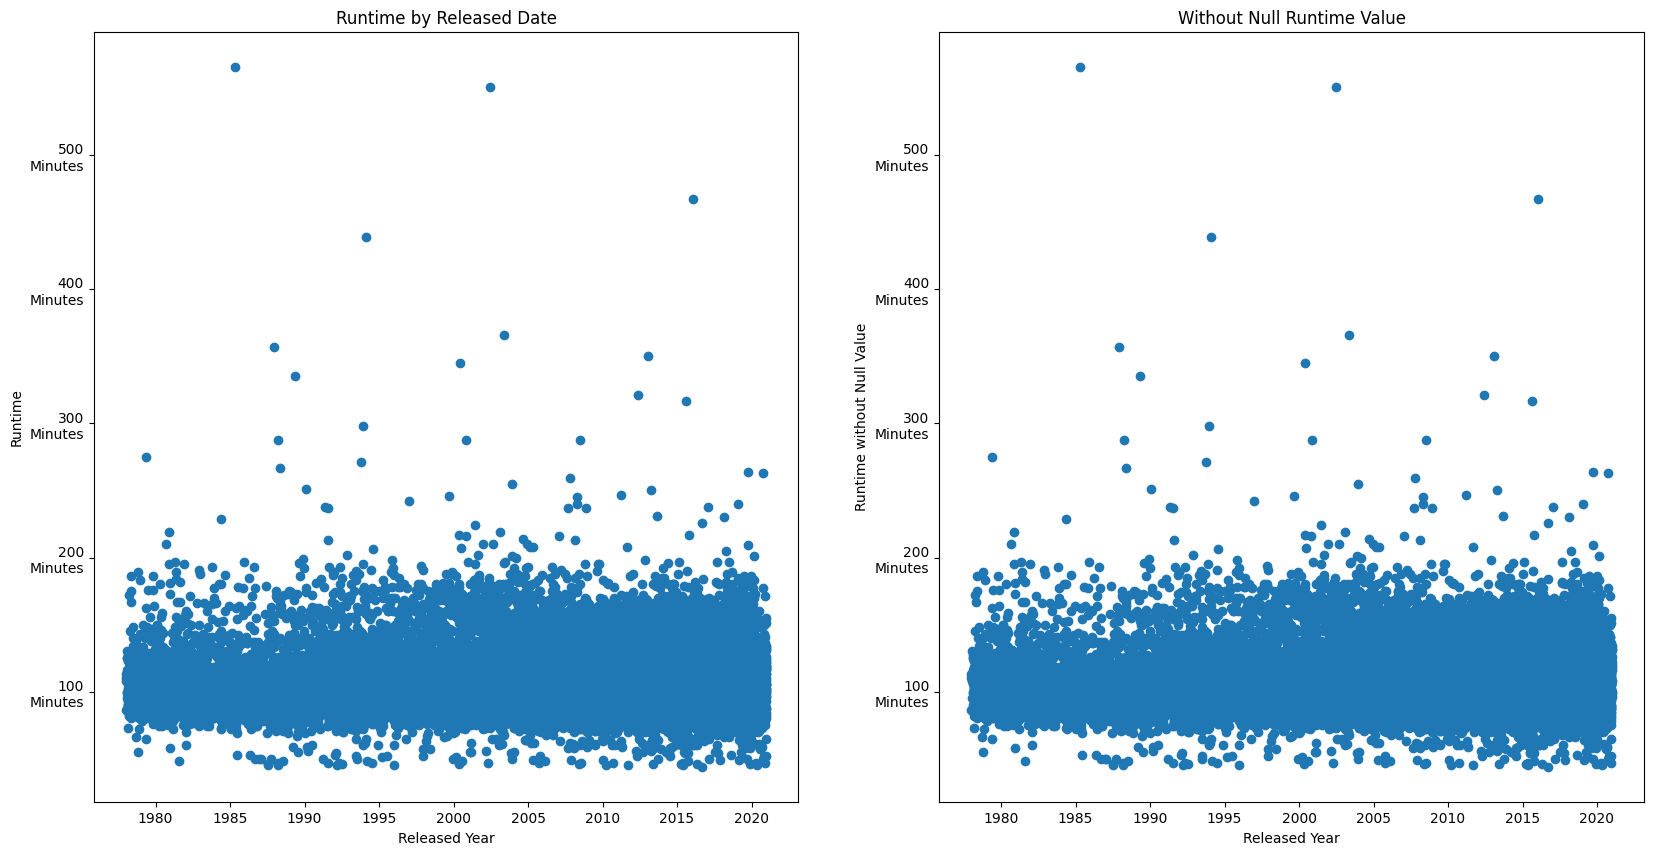

In [6]:
# Create tables using subplot to compare two different tables (with and without null value) at once
fig, ax = pyplot.subplots( 1 , 2 , figsize=(20,10))

# A custom formatter for mintues
def format_minutes(amount, _):
    if amount >= 500:
        return f"{round(amount/1)}\nMinutes"
    elif amount >= 400:
        return f"{round(amount/1)}\nMinutes"
    elif amount >= 300:
        return f"{round(amount/1)}\nMinutes"
    elif amount >= 200:
        return f"{round(amount/1)}\nMinutes"
    elif amount >= 100:
        return f"{round(amount/1)}\nMinutes"
    else:
        return f"{round(amount/1)}\nMinutes"

# Set table 1
ax[0].scatter(x = imdb["release_date"], y = imdb["runtime"])
ax[0].title.set_text("Runtime by Released Date")
ax[0].set_xlabel("Released Year")
ax[0].set_ylabel("Runtime")
ax[0].yaxis.set_major_formatter(format_minutes)



# Write query to extact the data without null value
query_runtime = { "release_date" : {"$regex" :"\d{1,2}/\d{1,2}/\d{4}"},
                  "runtime" : {"$not": {"$eq": None}}
                 }

cursor_runtime = collection_imdb.find(query_runtime)

imdb_runtime = pd.DataFrame(cursor_runtime)

imdb_runtime["release_date"] = pd.to_datetime(imdb_runtime["release_date"], errors = "coerce")

# Set table 2 (without null value)
ax[1].scatter(imdb_runtime["release_date"], imdb_runtime["runtime"])
ax[1].title.set_text("Without Null Runtime Value")
ax[1].set_xlabel("Released Year")
ax[1].set_ylabel("Runtime without Null Value")
ax[1].yaxis.set_major_formatter(format_minutes)

print(f"Total Count with Null Value: {len(imdb)}")
print(f"Total Count without Null Value: {len(imdb_runtime)}")

Total Count with Null Value: 29443
Total Count without Null Value: 12807


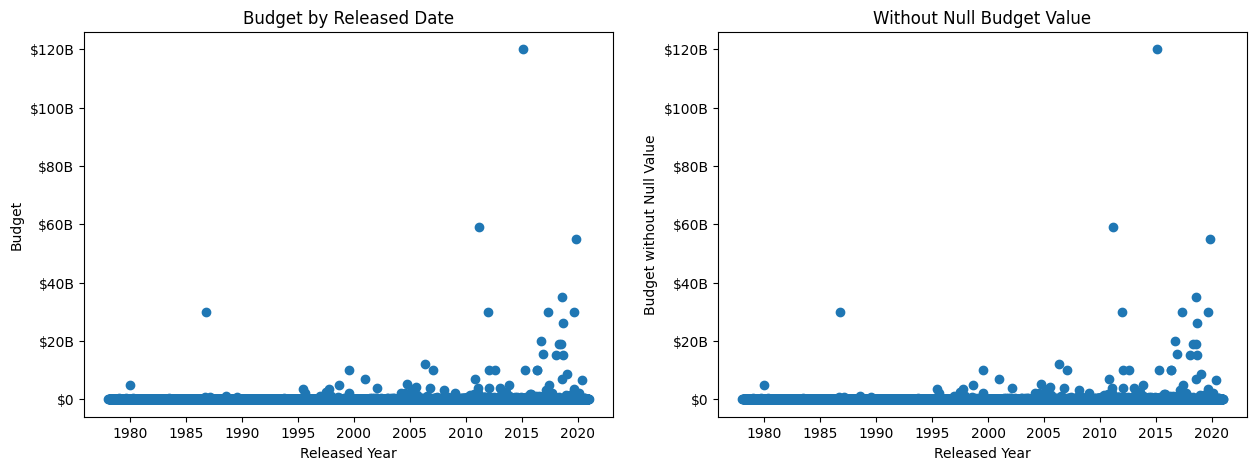

In [7]:
# Create tables using subplot to compare two different tables (with and without null value) at once
fig, ax = pyplot.subplots( 1 , 2 , figsize=(15,5))

# A custom formatter for currency sourced by Professor Ted 
def format_currency(amount, _):
    if amount > 1000000000000:
        return f"${round(amount / 1000000000000)}T"
    elif amount > 1000000000:
        return f"${round(amount / 1000000000)}B"
    elif amount > 1000000:
        return f"${round(amount / 1000000)}M"
    elif amount > 1000:
        return f"${round(amount / 1000)}K"
    else:
        return f"${round(amount)}"

# Set table 1
ax[0].scatter(x = imdb["release_date"], y = imdb["budget"])
ax[0].title.set_text("Budget by Released Date")
ax[0].set_xlabel("Released Year")
ax[0].set_ylabel("Budget")
ax[0].yaxis.set_major_formatter(format_currency)


# Write query to extact the data without null value
query_budget = { "release_date" : {"$regex" :"\d{1,2}/\d{1,2}/\d{4}"},
                  "budget" : {"$not": {"$eq": None}}
                 }

cursor_budget = collection_imdb.find(query_budget)

imdb_budget = pd.DataFrame(cursor_budget)

imdb_budget["release_date"] = pd.to_datetime(imdb_budget["release_date"], errors = "coerce")

# Set table 2 (without null value)
ax[1].scatter(imdb_budget["release_date"], imdb_budget["budget"])
ax[1].title.set_text("Without Null Budget Value")
ax[1].set_xlabel("Released Year")
ax[1].set_ylabel("Budget without Null Value")
ax[1].yaxis.set_major_formatter(format_currency)

print(f"Total Count with Null Value: {len(imdb)}")
print(f"Total Count without Null Value: {len(imdb_budget)}")

Before I created the tables, I expected having null values in the database would make a big difference. However, it actually did not seem to matter in the dataset. For example, 16636 documents have null budget data in the dataset of 29443 documents, but both of graphs with and without null values look the same. 
The majority of the runtime values are under 200 minutes, and the budget values are under $20 Billion in the graph. I believe it will be great to analyze the data if we extract the information from the concentrated areas by excluding the outliers. We will be able to segregate them in smaller units.